# **Import Libraries**

In [2]:
import tensorflow as tf
import os 
import numpy as np
import cv2
import matplotlib.pyplot as plt

# **Define the paths**

In [3]:
files=['test/','train/','val/']
classes=['NORMAL/', 'PNEUMONIA/']
mainfilePath='chest_xray/'

In [4]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]
x_val=[]
y_val=[]

In [5]:
for file in files:
    if file == 'train/':
        for classe in classes:
            images=os.listdir(mainfilePath+file+classe)
            for image in images:
                im=cv2.imread(mainfilePath+file+classe+image)
                im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
                im=cv2.resize(im,(224,224))
                x_train.append(im)
                if classe=='NORMAL/': #if normal put 0 in the label list
                    y_train.append([0])
                else:
                    y_train.append([1])
    elif file=='val/':
            for classe in classes:
                images=os.listdir(mainfilePath+file+classe)
                for image in images:
                    im=cv2.imread(mainfilePath+file+classe+image)
                    im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
                    im=cv2.resize(im,(224,224))
                    x_val.append(im)
                    if classe=='NORMAL/': #if normal put 0 in the label list
                        y_val.append([0])
                    else:
                        y_val.append([1])
    elif file=='test/':
        for classe in classes:
            images=os.listdir(mainfilePath+file+classe)
            for image in images:
                im=cv2.imread(mainfilePath+file+classe+image)
                im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
                im=cv2.resize(im,(224,224))
                x_test.append(im)
                if classe=='NORMAL/': #if normal put 0 in the label list
                    y_test.append([0])
                else:
                    y_test.append([1])
        pass

In [6]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
x_val=np.array(x_val)
y_val=np.array(y_val)

# Normalize the data

In [21]:
x_train=x_train/255
x_test=x_test/255
x_val=x_val/255

# Plotting samples from the image

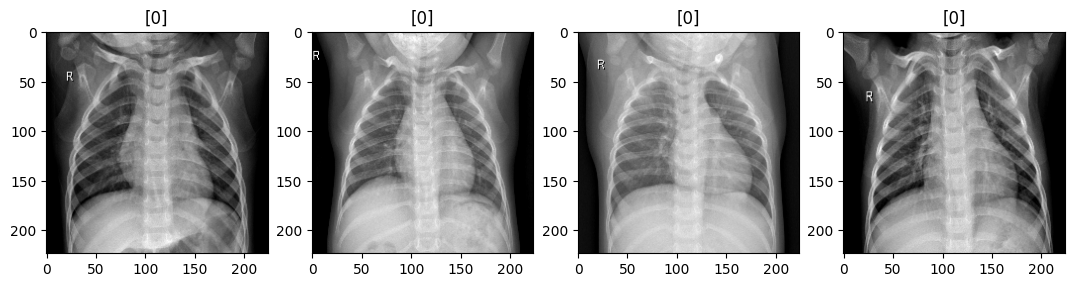

In [23]:
#plot sample images
fig=plt.figure(figsize=(20,20))
for i in range(1,5):
    fig.add_subplot(1,6,i)
    plt.imshow(x_train[i])
    plt.title(y_train[i])

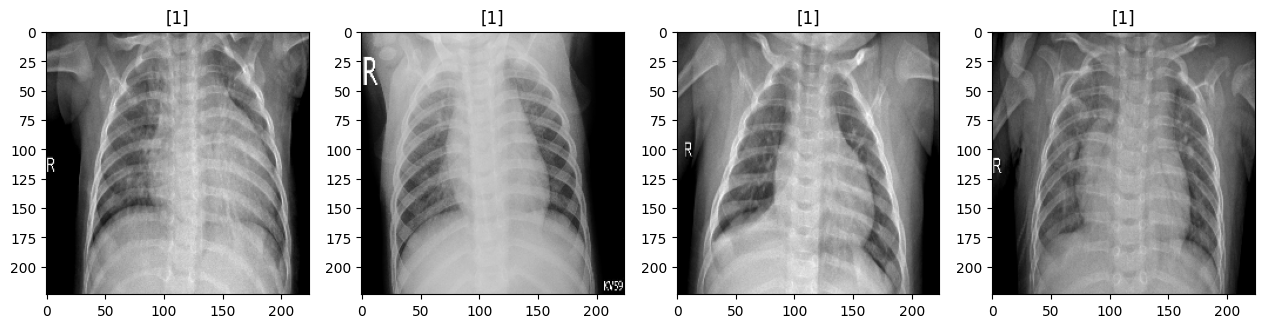

In [24]:
#plot sample images
fig=plt.figure(figsize=(40,40))
for i in range(1,5):
    fig.add_subplot(1,10,i)
    plt.imshow(x_train[5000+i])
    plt.title(y_train[5000+i])

# Prepare the Archeticture

In [86]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(224, 224, 3)))
model.add(tf.keras.layers.MaxPooling2D((5, 5)))
model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((5, 5)))
model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))



In [82]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 220, 220, 32)      2432      
                                                                 
 dropout_16 (Dropout)        (None, 220, 220, 32)      0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 106, 106, 32)      25632     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 89888)           

In [84]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size=40,use_multiprocessing=True)


Epoch 1/10
131/131 [==============================] - 250s 2s/step - loss: 0.3328 - accuracy: 0.8570 - val_loss: 0.5870 - val_accuracy: 0.6875
Epoch 2/10
131/131 [==============================] - 228s 2s/step - loss: 0.2515 - accuracy: 0.9333 - val_loss: 0.3734 - val_accuracy: 0.9375
Epoch 3/10
131/131 [==============================] - 222s 2s/step - loss: 0.3347 - accuracy: 0.8646 - val_loss: 0.5178 - val_accuracy: 0.8125
Epoch 4/10
123/131 [===========================>..] - ETA: 13s - loss: 0.2345 - accuracy: 0.9358

KeyboardInterrupt: 

In [48]:
predicted_label=model.predict(x_test)
predicted_label=np.round(predicted_label)
predicted_label=predicted_label.astype(int)

20/20 [==============================] - 3s 164ms/step


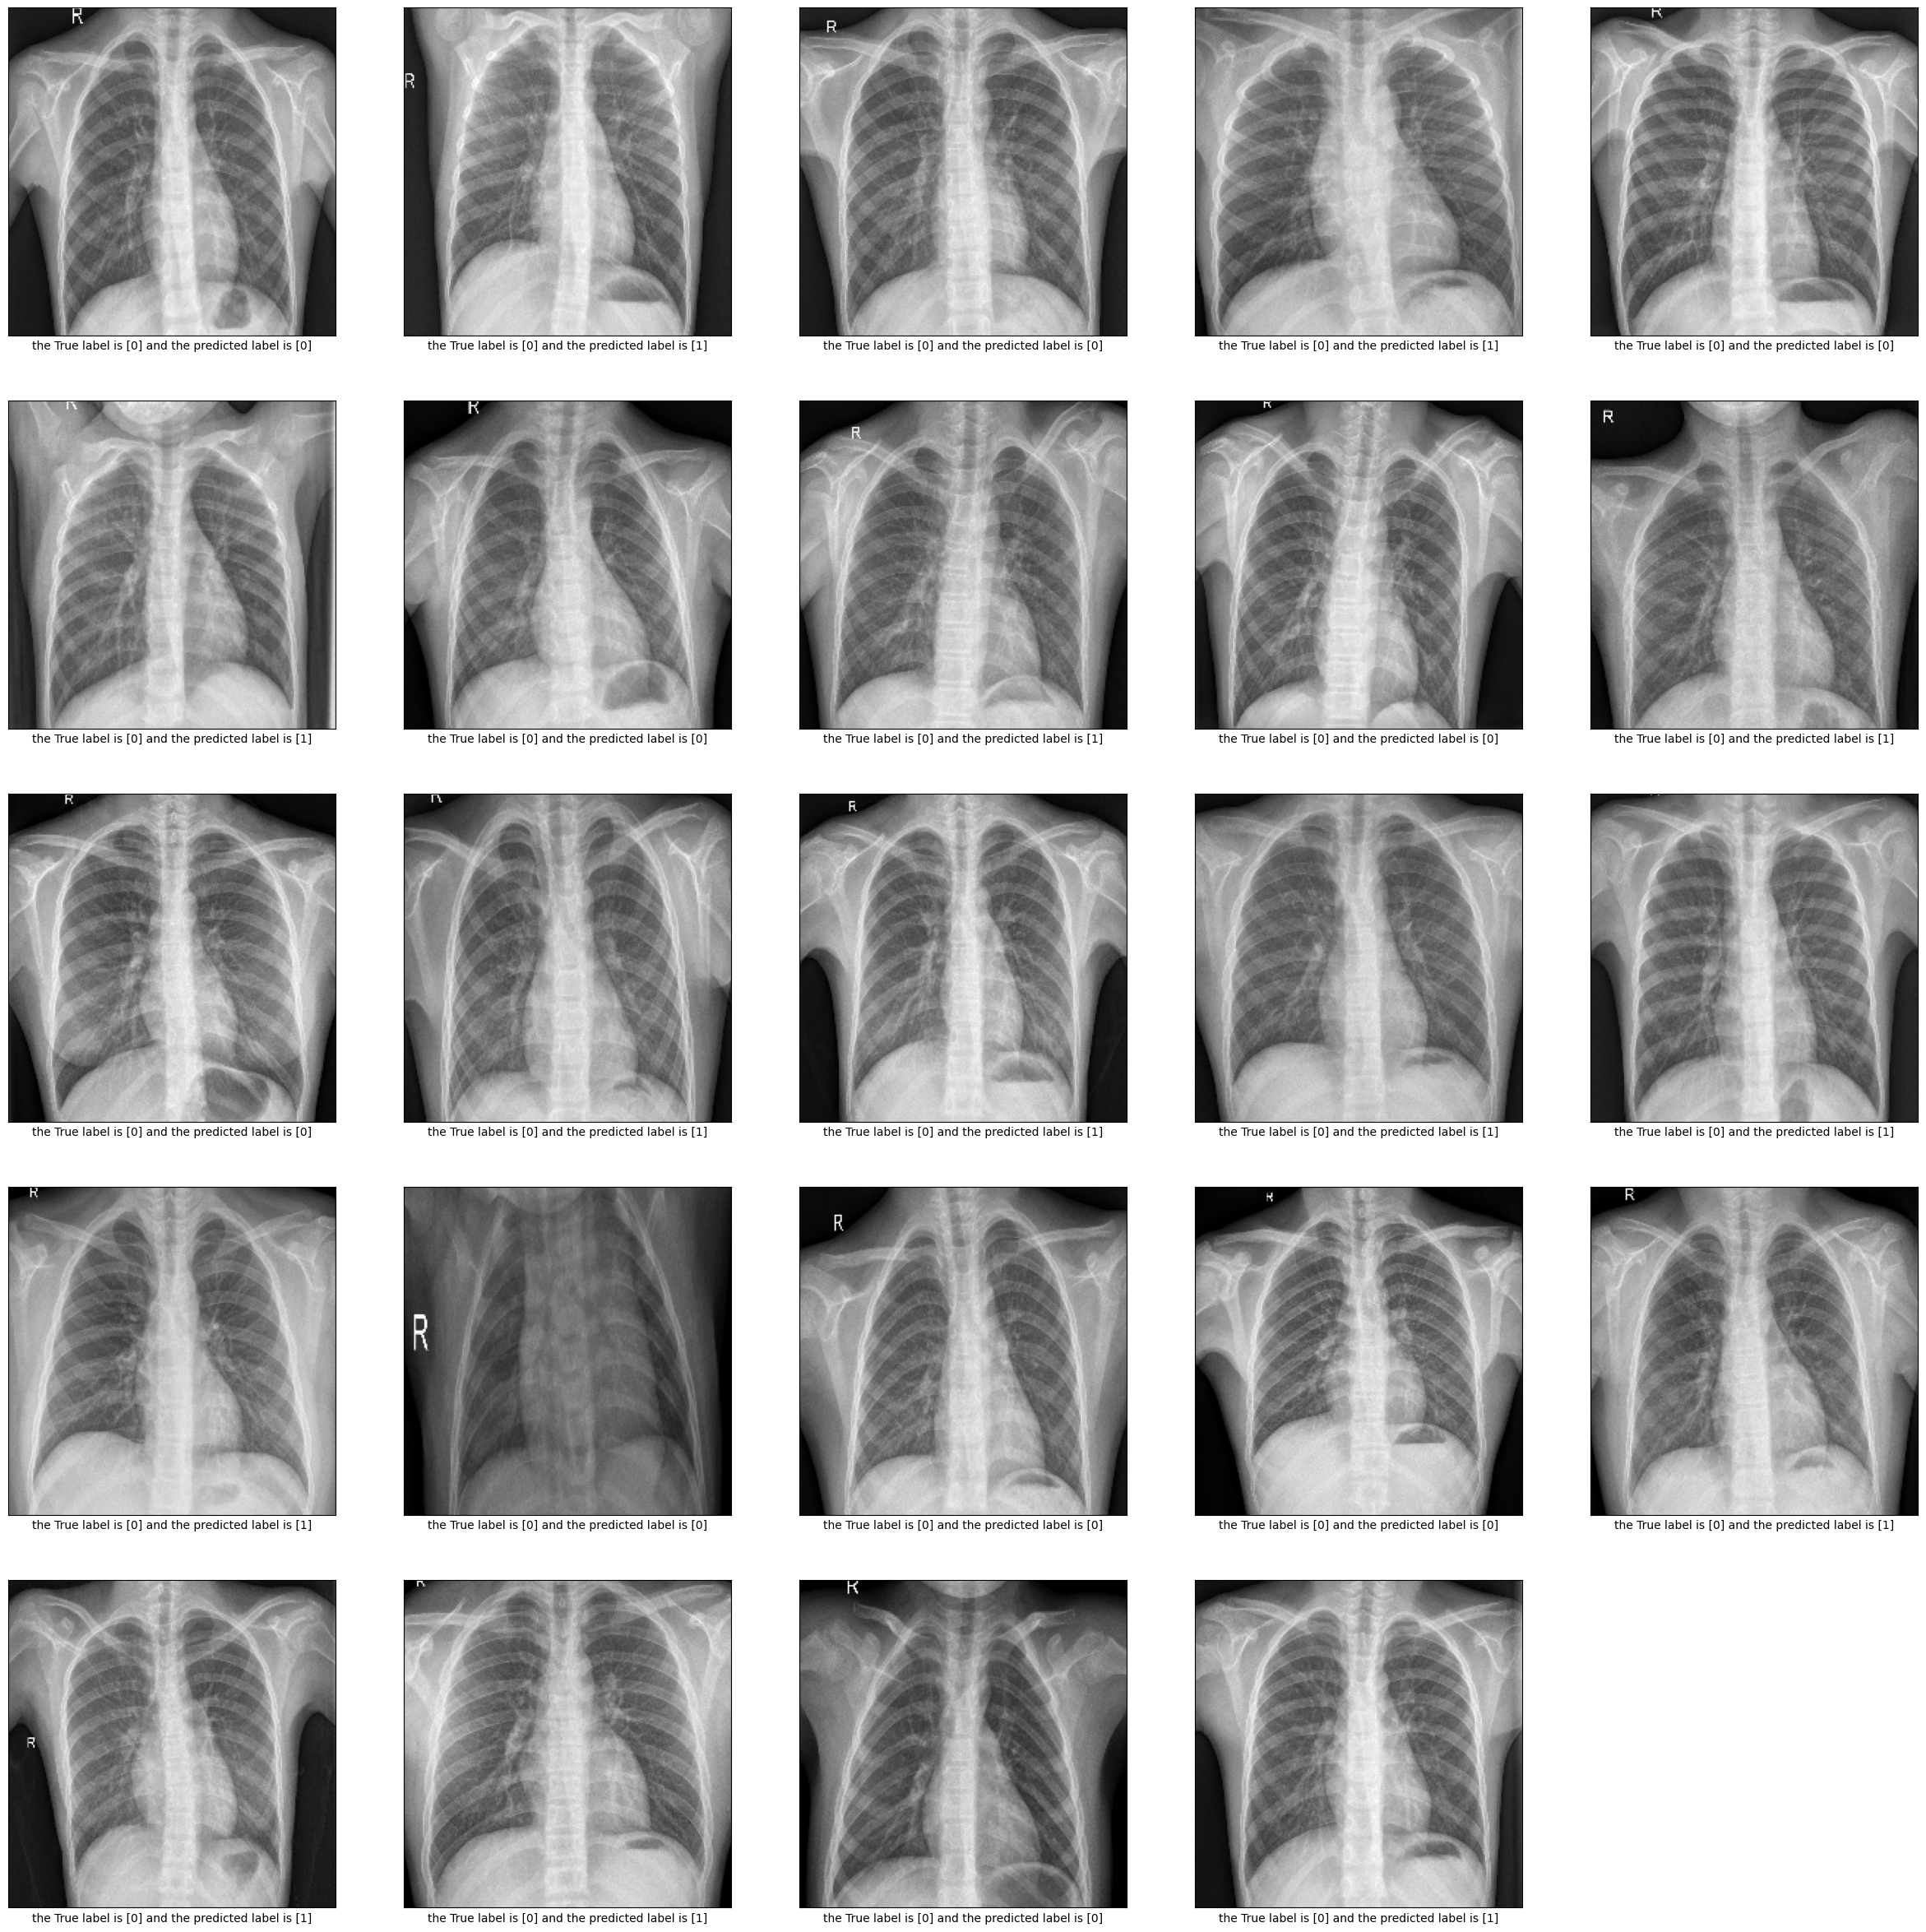

In [55]:
plt.figure(figsize=(30,30))
for i in range(24):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(f"the True label is {y_test[i]} and the predicted label is {predicted_label[i]}")
plt.show()


In [ ]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, [0,1])